In [47]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

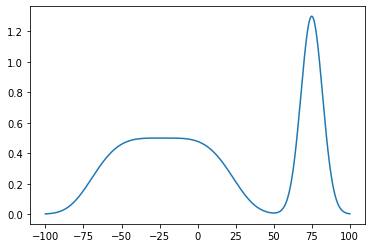

In [189]:
def f(x):
    return 0.5*np.exp(-np.power((x+23)/50,4)) + 1.3*np.exp(-np.power((x-75)/10,2))
xs = np.linspace(-100,100,10000)
plt.plot(xs,[f(p) for p in xs])

# problem: we'd like to create a probability density distribution f/int(f) defined for x \in R
# we don't actually want to calculate int(f) bc it is expensive or numerically unstable (maybe integral over energies)
# how do sample from f/int(f) without actually calculating int(f)?

# let's approximate int(f) to check
norm = scipy.integrate.trapz([f(xx) for xx in xs],xs)

# let's call p(x) = f(x)/int(f)
sig=100
iters_burn_in = 1000 # what's the point of burn-in?
iters_generate = 50000

# symmetric acceptance distribution
def g_sym(mu,sigma):
    return sigma * np.random.randn() + mu
# asymmetric acceptance distribution
def g_asym(mu):
    return mu

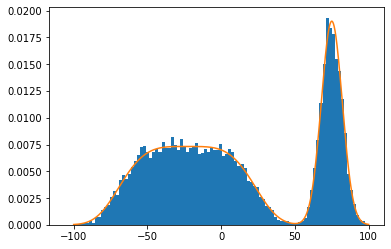

In [190]:
# symmetric version
x = 0
p_samples = [] # this will have a  hsitogram which has pdf f/int(f)
g = g_sym
for i in range(iters_burn_in + iters_generate):
    x_next_candidate = g(x,sig)
    r_f = f(x_next_candidate)/f(x)
    r_g = 1. #g(a|b)/g(a|b)
    accept_crit = np.min((1., r_f*r_g))
    accept_prob = np.random.uniform(0,1)
    x = x_next_candidate if accept_prob <= accept_crit else x
    if i > iters_burn_in:
        p_samples.append(x)
        
plt.hist(p_samples, density=True, bins = 100)
xs = np.linspace(-100,100,1000)
plt.plot(xs,[f(p)/norm for p in xs])

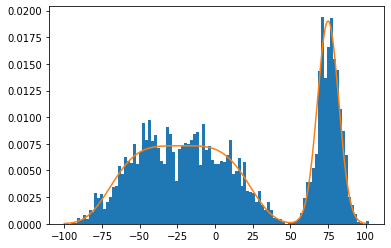

In [182]:
# symmetric version
x = 0
p_samples = [] # this will have a  hsitogram which has pdf f/int(f)
g = g_asym
for i in range(iters_burn_in + iters_generate):
    x_next_candidate = g(x,sig)
    r_f = f(x_next_candidate)/f(x)
    r_g = 1. #g(a|b)/g(a|b)
    accept_crit = np.min((1., r_f*r_g))
    accept_prob = np.random.uniform(0,1)
    x = x_next_candidate if accept_prob <= accept_crit else x
    if i > iters_burn_in:
        p_samples.append(x)
        
plt.hist(p_samples, density=True, bins = 100)
xs = np.linspace(-100,100,1000)
plt.plot(xs,[f(p)/norm for p in xs])

In [ ]:
x = 0
p_samples = [] # this will have a  hsitogram which has pdf f/int(f)
g = g_sym
for i in range(iters_burn_in + iters_generate):
    x_next_candidate = g(x,sig)
    r_f = f(x_next_candidate)/f(x)
    r_g = 1.# todo g(a|b)/g(a|b)
    accept_crit = np.min((1., r_f*r_g))
    accept_prob = np.random.uniform(0,1)
    x = x_next_candidate if accept_prob <= accept_crit else x
    if i > iters_burn_in:
        p_samples.append(x)

In [ ]:
# P(drawn from p|accept) = P(accept | drawn from p ) * P(drawn from p) / P(accept)
#                        = 

# P(drawn from p | accept) = P(accept | drawn from p) * P(drawn from p) / P(accept)